In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy

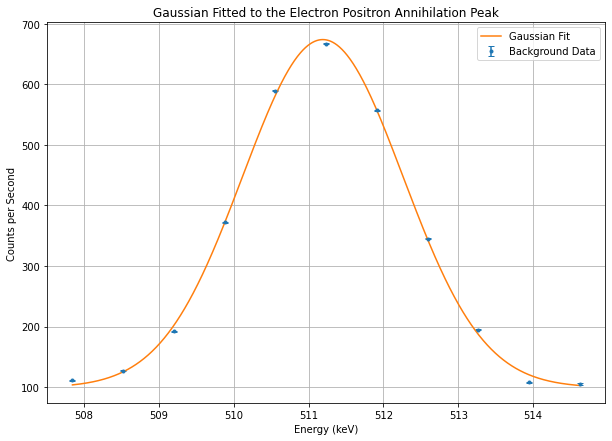

In [2]:
def gauss(x, a, x0, c, sig):
    return a*np.exp(-(x-x0)**2/(2*sig**2)) + c

bins, counts = np.loadtxt("HPGeBackgroundData.csv", delimiter=",", unpack=True)
new_bins = np.linspace(min(bins[749:760]), max(bins[749:760]), 1000)
y_error = np.array([1]*len(counts[749:760]))
popt, pcov = curve_fit(gauss, bins[749:760], counts[749:760], sigma = y_error, p0=[20, 511, 100, 50], bounds=[[0, 0, 0, 0], [1000, 550, 500, 1000]])

plt.figure(figsize=(10, 7))
plt.errorbar(bins[749:760], counts[749:760], yerr=y_error, fmt=".", label="Background Data", capsize=3)
plt.plot(new_bins, gauss(new_bins, *popt), label="Gaussian Fit")
plt.title("Gaussian Fitted to the Electron Positron Annihilation Peak")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts per Second")
plt.legend(loc="best")
plt.grid(True)

b = -0.019 ± 0.003,  c = -0.057 ± 0.020


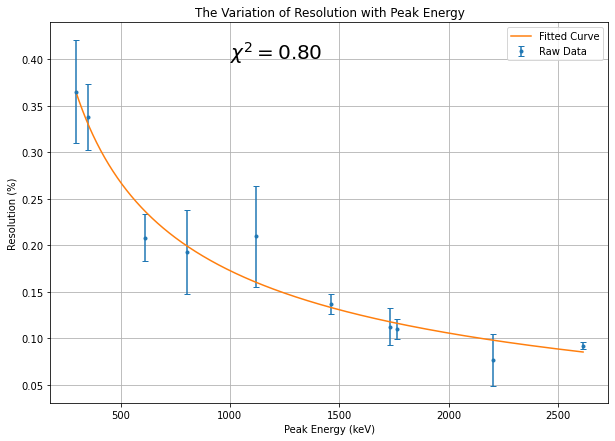

In [3]:
def func(x, b, c):
    return (1/np.sqrt(np.abs(b*x))) + c

energies = np.array([295.58, 352.44, 609.83, 803.59, 1120.58, 1461.62, 1730.50, 1765.27, 2204.60, 2615.39])
FWHM = np.array([1.08, 1.19, 1.27, 1.55, 2.35, 2.00, 1.95, 1.94, 1.70, 2.4102])
resolution = (FWHM/energies)*100
FWHM_error = np.array([0.1651, 0.1255, 0.1526, 0.3665, 0.6115, 0.1518, 0.3428, 0.1920, 0.6132, 0.1012])

popt, pcov = curve_fit(func, energies, resolution)
err = np.sqrt(np.diag(pcov))

resids = func(energies, *popt) - resolution
norm_resids = resids/((100/energies)*FWHM_error)
dof = len(resolution) - len(popt)
red_chi_sq = np.sum(norm_resids**2) / dof

plt.figure(figsize=(10, 7))
plt.errorbar(energies, resolution, yerr=(100/energies)*FWHM_error, fmt=".", label="Raw Data", capsize=3.0)
plt.plot(np.linspace(min(energies), max(energies), 1000), func(np.linspace(min(energies), max(energies), 1000), *popt), label="Fitted Curve")
plt.text(1000, 0.4, f"$\chi^{2} = {red_chi_sq:0.2f}$", fontsize=20)
plt.xlabel("Peak Energy (keV)")
plt.ylabel("Resolution (%)")
plt.title("The Variation of Resolution with Peak Energy")
plt.legend(loc="best")
plt.grid(True)

print(f"b = {popt[0]:0.3f} ± {err[0]:0.3f},  c = {popt[1]:0.3f} ± {err[1]:0.3f}")

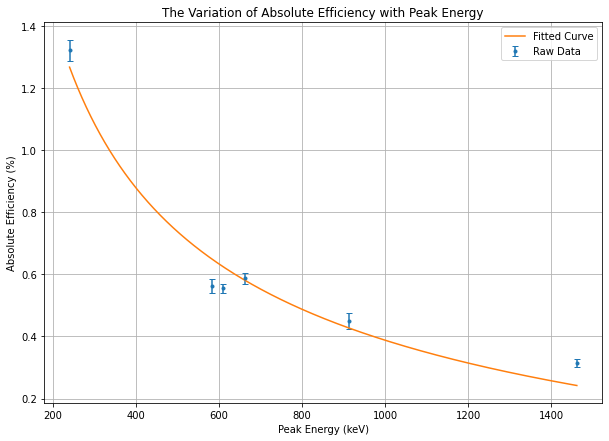

In [4]:
def efficiency(cps, b_cps, b_ratio, true_act, mass):
    effect_act = ((cps - b_cps)/b_ratio) / mass
    return (effect_act / true_act)

energy = np.array([1462.22, 662.56, 610.09, 239.60, 912.18, 583.91])
counts = np.array([0.01026, 0.004961, 0.002921, 0.008375, 0.00195, 0.002887])
counts_sample_4 = np.array([0.1183, 0.03643, 0.01953, 0.04191, 0.009012, 0.0145])
background_counts = np.array([0.0008391, 0, 0.0008109, 0, 0, 0])
branching_ratio = np.array([0.1067, 0.8533, 0.461, 0.3748, 0.258, 0.3055])
true_activities = np.array([611, 19.8, 22.8, 33.8, 33.6, 33.6])

efficiency_arr = efficiency(counts, 0, branching_ratio, true_activities, 50/1000)

effect_activity = true_activities*efficiency_arr
true_act_err = np.array([27, 0.6, 0.6, 0.9, 2.0, 1.4])
cps_err = np.array([0.00013, 9.9e-5, 7.7e-5, 0.000143, 6.4e-5, 7.8e-5])
cps_err_4 = np.array([0.00048, 0.00028, 0.00022, 0.00034, 0.000149, 0.0002])
eff_err = (efficiency_arr * 100) * np.sqrt((cps_err/effect_activity)**2 + (true_act_err/true_activities)**2)

popt2, pcov2 = curve_fit(func, energy, efficiency_arr*100)
err2 = np.sqrt(np.diag(pcov2))

resids2 = func(energy, *popt2) - (efficiency_arr*100)
norm_resids2 = resids2 / eff_err
dof2 = len(efficiency_arr) - len(popt2)
red_chi_sq2 = np.sum(norm_resids2**2) / dof2

plt.figure(figsize=(10, 7))
plt.errorbar(energy, efficiency_arr*100, yerr=eff_err, fmt=".", label="Raw Data", capsize=3.0)
plt.plot(np.linspace(min(energy), max(energy), 1000), func(np.linspace(min(energy), max(energy), 1000), *popt2), label="Fitted Curve")
#plt.text(400, 1.2, f"$\chi^{2} = {red_chi_sq2:0.2f}$", fontsize=20)
plt.xlabel("Peak Energy (keV)")
plt.ylabel("Absolute Efficiency (%)")
plt.title("The Variation of Absolute Efficiency with Peak Energy")
plt.legend(loc="best")
plt.grid(True)

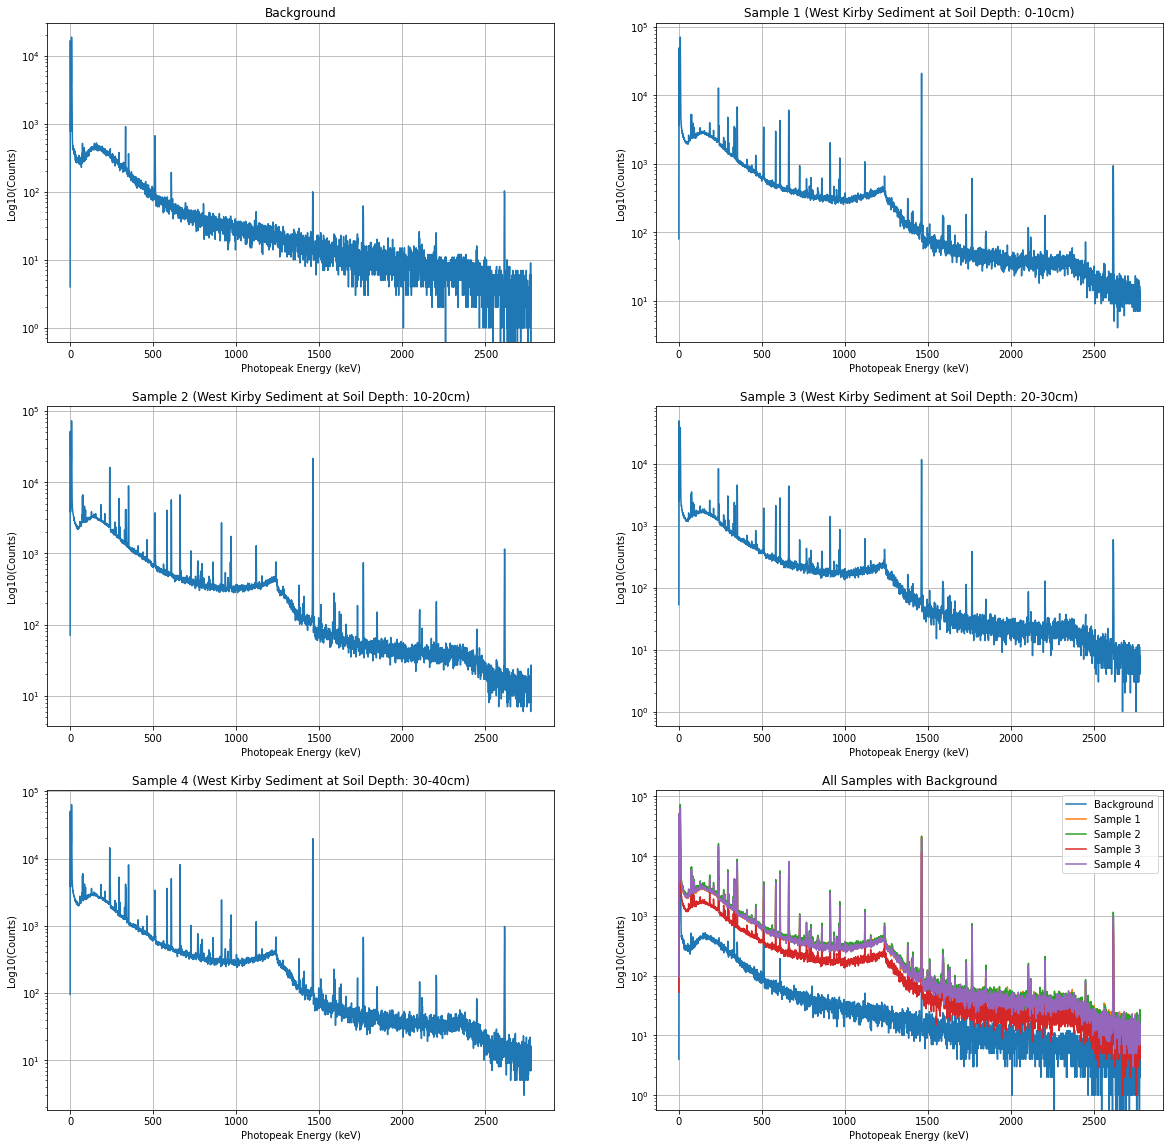

In [5]:
energyb, countsb = np.loadtxt("HPGeBackgroundData.csv", delimiter=",", unpack=True)
energy1, counts1 = np.loadtxt("Sample1.csv", delimiter=",", unpack=True)
energy2, counts2 = np.loadtxt("Sample2.csv", delimiter=",", unpack=True)
energy3, counts3 = np.loadtxt("Sample3.csv", delimiter=",", unpack=True)
energy4, counts4 = np.loadtxt("Sample4.csv", delimiter=",", unpack=True)

fig, axs = plt.subplots(3, 2)
fig.set_figheight(20)
fig.set_figwidth(20)

axs[0, 0].plot(energyb, countsb, label="Background Data")
axs[0, 0].set_xlabel("Photopeak Energy (keV)")
axs[0, 0].set_ylabel("Log10(Counts)")
axs[0, 0].set_yscale("log")
axs[0, 0].set_title("Background")
axs[0, 0].grid(True)

axs[0, 1].plot(energy1, counts1, label="Sample 1 Data")
axs[0, 1].set_xlabel("Photopeak Energy (keV)")
axs[0, 1].set_ylabel("Log10(Counts)")
axs[0, 1].set_yscale("log")
axs[0, 1].set_title("Sample 1 (West Kirby Sediment at Soil Depth: 0-10cm)")
axs[0, 1].grid(True)

axs[1, 0].plot(energy2, counts2, label="Sample 2 Data")
axs[1, 0].set_xlabel("Photopeak Energy (keV)")
axs[1, 0].set_ylabel("Log10(Counts)")
axs[1, 0].set_yscale("log")
axs[1, 0].set_title("Sample 2 (West Kirby Sediment at Soil Depth: 10-20cm)")
axs[1, 0].grid(True)

axs[1, 1].plot(energy3, counts3, label="Sample 3 Data")
axs[1, 1].set_xlabel("Photopeak Energy (keV)")
axs[1, 1].set_ylabel("Log10(Counts)")
axs[1, 1].set_yscale("log")
axs[1, 1].set_title("Sample 3 (West Kirby Sediment at Soil Depth: 20-30cm)")
axs[1, 1].grid(True)

axs[2, 0].plot(energy4, counts4, label="Sample 4 Data")
axs[2, 0].set_xlabel("Photopeak Energy (keV)")
axs[2, 0].set_ylabel("Log10(Counts)")
axs[2, 0].set_yscale("log")
axs[2, 0].set_title("Sample 4 (West Kirby Sediment at Soil Depth: 30-40cm)");
axs[2, 0].grid(True)

axs[2, 1].plot(energyb, countsb, label="Background")
axs[2, 1].plot(energy1, counts1, label="Sample 1")
axs[2, 1].plot(energy2, counts2, label="Sample 2")
axs[2, 1].plot(energy3, counts3, label="Sample 3")
axs[2, 1].plot(energy4, counts4, label="Sample 4")
axs[2, 1].set_xlabel("Photopeak Energy (keV)")
axs[2, 1].set_ylabel("Log10(Counts)")
axs[2, 1].set_yscale("log")
axs[2, 1].set_title("All Samples with Background");
axs[2, 1].legend(loc="best")
axs[2, 1].grid(True)

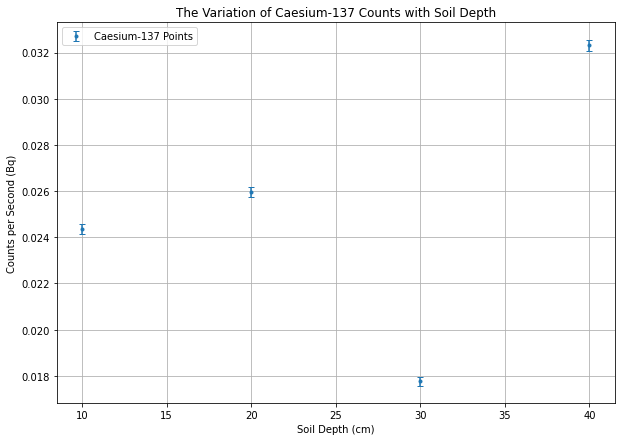

In [6]:
caesium_counts = np.array([0.02437, 0.02596, 0.01777, 0.03231])
soil_depths = np.array([10, 20, 30, 40])
caesium_counts_err = np.array([0.00022, 0.00023, 0.00019, 0.00025])

plt.figure(figsize=(10, 7))
plt.errorbar(soil_depths, caesium_counts, yerr=caesium_counts_err, fmt=".", capsize=3.0, label="Caesium-137 Points")
plt.title("The Variation of Caesium-137 Counts with Soil Depth")
plt.xlabel("Soil Depth (cm)")
plt.ylabel("Counts per Second (Bq)")
plt.legend(loc="best")
plt.grid(True)